### Part 2: Poetry generation (for real)

Let's try to generate some poetry using RNNs.

You have several choices here:

* The Shakespeare sonnets, file `sonnets.txt` available in the notebook directory.

* Роман в стихах "Евгений Онегин" Александра Сергеевича Пушкина. В предобработанном виде доступен по [ссылке](https://github.com/attatrol/data_sources/blob/master/onegin.txt).

* Some other text source, if it will be approved by the course staff.

Text generation can be designed in several steps:
    
1. Data loading.
2. Dictionary generation.
3. Data preprocessing.
4. Model (neural network) training.
5. Text generation (model evaluation).


In [27]:
import string
import os

### Data loading: Shakespeare

Shakespeare sonnets are awailable at this [link](http://www.gutenberg.org/ebooks/1041?msg=welcome_stranger). In addition, they are stored in the same directory as this notebook (`sonnetes.txt`). Simple preprocessing is already done for you in the next cell: all technical info is dropped.

In [28]:
if not os.path.exists('sonnets.txt'):
    !wget https://github.com/girafe-ai/ml-course/blob/24f_mipt/homeworks/lab03_deep_learning/sonnets.txt

with open('sonnets.txt', 'r') as iofile:
    text = iofile.readlines()

TEXT_START = 45
TEXT_END = -368
text = text[TEXT_START : TEXT_END]
print(len(text))
# assert len(text) == 2616 не проходит, буду использовать текст Евгенгия Онегина

2304


In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [29]:
# Join all the strings into one and lowercase it
# Put result into variable text.

# Your great code here

# assert len(text) == 100225, "Are you sure you have concatenated all the strings?"
# assert not any([x in set(text) for x in string.ascii_uppercase]), "Uppercase letters are present"
# print("OK!")

### Data loading: "Евгений Онегин"


In [30]:
!wget https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt

with open('onegin.txt', 'r') as iofile:
    text = iofile.readlines()

text = [x.replace('\t\t', '') for x in text]

--2024-12-10 17:01:14--  https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262521 (256K) [text/plain]
Saving to: ‘onegin.txt.1’

onegin.txt.1        100%[===================>] 256.37K  --.-KB/s    in 0.04s   

2024-12-10 17:01:14 (6.70 MB/s) - ‘onegin.txt.1’ saved [262521/262521]



In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [31]:
# Join all the strings into one and lowercase it
# Put result into variable text.

out = ''.join(text).lower()
out

'\ni\n\n«мой дядя самых честных правил,\nкогда не в шутку занемог,\nон уважать себя заставил\nи лучше выдумать не мог.\nего пример другим наука;\nно, боже мой, какая скука\nс больным сидеть и день и ночь,\nне отходя ни шагу прочь!\nкакое низкое коварство\nполуживого забавлять,\nему подушки поправлять,\nпечально подносить лекарство,\nвздыхать и думать про себя:\nкогда же черт возьмет тебя!»\n\n\n\nii\n\nтак думал молодой повеса,\nлетя в пыли на почтовых,\nвсевышней волею зевеса\nнаследник всех своих родных. —\nдрузья людмилы и руслана!\nс героем моего романа\nбез предисловий, сей же час\nпозвольте познакомить вас:\nонегин, добрый мой приятель,\nродился на брегах невы,\nгде, может быть, родились вы\nили блистали, мой читатель;\nтам некогда гулял и я:\nно вреден север для меня\n\n\niii\n\nслужив отлично-благородно,\nдолгами жил его отец,\nдавал три бала ежегодно\nи промотался наконец.\nсудьба евгения хранила:\nсперва madame за ним ходила,\nпотом monsieur ее сменил;\nребенок был резов, но 

Put all the characters, that you've seen in the text, into variable `tokens`.

In [32]:
tokens = sorted(set(out))

Create dictionary `token_to_idx = {<char>: <index>}` and dictionary `idx_to_token = {<index>: <char>}`

In [33]:
# dict <index>:<char>
# Your great code here

# dict <char>:<index>
# Your great code here

token_to_id = {char: i for i, char in enumerate(tokens)}
id_to_token = {i: char for i, char in enumerate(tokens)}

from torch.utils.data import DataLoader, Dataset

data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

*Comment: in this task we have only 38 different tokens, so let's use one-hot encoding.*

(у Пушкина больше токенов)

### Building the model

Now we want to build and train recurrent neural net which would be able to something similar to Shakespeare's poetry.

Let's use vanilla RNN, similar to the one created during the lesson.

In [67]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class VanillaRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(VanillaRNN, self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.activation = nn.Tanh()

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.activation(self.i2h(combined))
        output = self.i2o(combined)
        return output, hidden

    def initial_state(self, batch_size):
        return torch.zeros(batch_size, self.hidden_size)

Plot the loss function (axis X: number of epochs, axis Y: loss function).

In [68]:
hidden_size = 100
input_size = len(tokens)
output_size = len(tokens)
model = VanillaRNN(input_size, hidden_size, output_size)

In [69]:
seq_length = 25

text_indices = [token_to_idx[char] for char in out]
input_sequences = []
target_sequences = []
for i in range(0, len(text_indices) - seq_length, seq_length):
    input_sequences.append(text_indices[i : i + seq_length])
    target_sequences.append(text_indices[i + 1 : i + seq_length + 1])
input_sequences = torch.tensor(input_sequences)
target_sequences = torch.tensor(target_sequences)

Epoch [1/30], Loss: 3.4404
Epoch [2/30], Loss: 3.2471
Epoch [3/30], Loss: 3.1878
Epoch [4/30], Loss: 3.1257
Epoch [5/30], Loss: 3.0465
Epoch [6/30], Loss: 2.9672
Epoch [7/30], Loss: 2.8830
Epoch [8/30], Loss: 2.8175
Epoch [9/30], Loss: 2.7621
Epoch [10/30], Loss: 2.7146
Epoch [11/30], Loss: 2.6719
Epoch [12/30], Loss: 2.6322
Epoch [13/30], Loss: 2.5943
Epoch [14/30], Loss: 2.5581
Epoch [15/30], Loss: 2.5233
Epoch [16/30], Loss: 2.4893
Epoch [17/30], Loss: 2.4562
Epoch [18/30], Loss: 2.4228
Epoch [19/30], Loss: 2.3887
Epoch [20/30], Loss: 2.3537
Epoch [21/30], Loss: 2.3176
Epoch [22/30], Loss: 2.2817
Epoch [23/30], Loss: 2.2456
Epoch [24/30], Loss: 2.2092
Epoch [25/30], Loss: 2.1718
Epoch [26/30], Loss: 2.1333
Epoch [27/30], Loss: 2.0965
Epoch [28/30], Loss: 2.0698
Epoch [29/30], Loss: 2.0359
Epoch [30/30], Loss: 1.9982


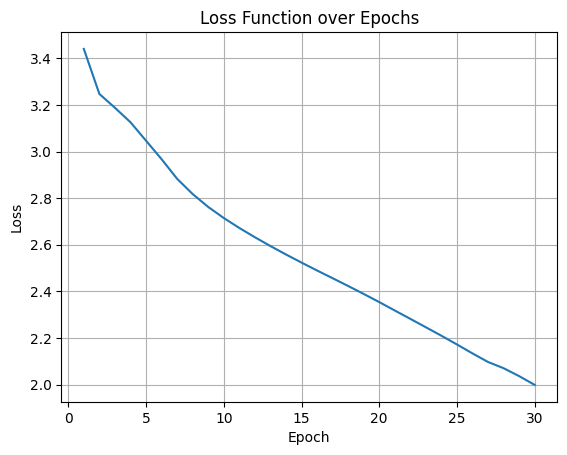

In [71]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= 0.001)

batch_size = 40
num_epochs = 30

loss_history = []
for epoch in range(num_epochs):
    total_loss = 0
    for i in range(0, input_sequences.shape[0], batch_size):
        input_batch = input_sequences[i : i + batch_size]
        target_batch = target_sequences[i : i + batch_size]
        optimizer.zero_grad()
        hidden = model.initial_state(batch_size=input_batch.shape[0])

        for j in range(seq_length):
            input_tensor = input_batch[:, j].unsqueeze(0)
            input_tensor = torch.nn.functional.one_hot(input_tensor, num_classes=len(tokens)).type(torch.float32)
            output, hidden = model(input_tensor.view(-1, len(tokens)), hidden)

        loss = loss_function(output, target_batch[:, -1])
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

    average_epoch_loss = total_loss / (input_sequences.shape[0] / batch_size)
    loss_history.append(average_epoch_loss)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {average_epoch_loss:.4f}")

plt.plot(range(1, num_epochs + 1), loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Function over Epochs')
plt.grid(True)
plt.show()

In [72]:
MAX_LENGTH = 100

def generate_sample(char_rnn, seed_phrase=" Хелло", max_length=MAX_LENGTH, temperature=1.0):
    """
    ### Disclaimer: this is an example function for text generation.
    ### You can either adapt it in your code or create your own function

    The function generates text given a phrase of length at least SEQ_LENGTH.
    :param seed_phrase: prefix characters. The RNN is asked to continue the phrase
    :param max_length: maximum output length, including seed_phrase
    :param temperature: coefficient for sampling.  higher temperature produces more chaotic outputs,
        smaller temperature converges to the single most likely output.

    Be careful with the model output. This model waits logits (not probabilities/log-probabilities)
    of the next symbol.
    """

    x_sequence = [token_to_id[token] for token in seed_phrase]
    x_sequence = torch.tensor([[x_sequence]], dtype=torch.int64)
    hid_state = char_rnn.initial_state(batch_size=1)

    # feed the seed phrase, if any
    for i in range(len(seed_phrase) - 1):
        print(x_sequence[:, -1].shape, hid_state.shape)
        out, hid_state = char_rnn(x_sequence[:, i], hid_state)

    # start generating
    for _ in range(max_length - len(seed_phrase)):
        print(x_sequence.shape, x_sequence, hid_state.shape)
        out, hid_state = char_rnn(x_sequence[:, -1], hid_state)
        # Be really careful here with the model output
        p_next = F.softmax(out / temperature, dim=-1).data.numpy()[0]

        # sample next token and push it back into x_sequence
        print(p_next.shape, len(tokens))
        next_ix = np.random.choice(len(tokens), p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        print(x_sequence.shape, next_ix.shape)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)

    return "".join([tokens[ix] for ix in x_sequence.data.numpy()[0]])

In [73]:
# An example of generated text.
print(generate_sample(model, seed_phrase="говно", max_length=500, temperature=0.2))

torch.Size([1, 5]) torch.Size([1, 100])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x105 and 183x100)

### More poetic model

Let's use LSTM instead of vanilla RNN and compare the results.

*Comment: if you wish, you can use small GPT as well (e.g. from https://github.com/karpathy/nanoGPT)*

Plot the loss function of the number of epochs. Does the final loss become better?

In [ ]:
# Your beautiful code here

Generate text using the trained net with different `temperature` parameter: `[0.1, 0.2, 0.5, 1.0, 2.0]`.

Evaluate the results visually, try to interpret them.

In [ ]:
# Text generation with different temperature values here

### Saving and loading models

Save the model to the disk, then load it and generate text. Examples are available [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html]).

In [ ]:
# Saving and loading code here

### References
1. <a href='http://karpathy.github.io/2015/05/21/rnn-effectiveness/'> Andrew Karpathy blog post about RNN. </a>
There are several examples of genration: Shakespeare texts, Latex formulas, Linux Sourse Code and children names.
2. <a href='https://github.com/karpathy/char-rnn'> Repo with char-rnn code </a>
3. Cool repo with PyTorch examples: [link](https://github.com/spro/practical-pytorch)
4. nanoGPT by Andrej Karpathy: https://github.com/karpathy/nanoGPT